# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [2]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib as plt

# Your code goes here for this section.
np.random.seed(42)
housing = pd.read_csv("housing.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fabb404d0>,
      dtype=object)

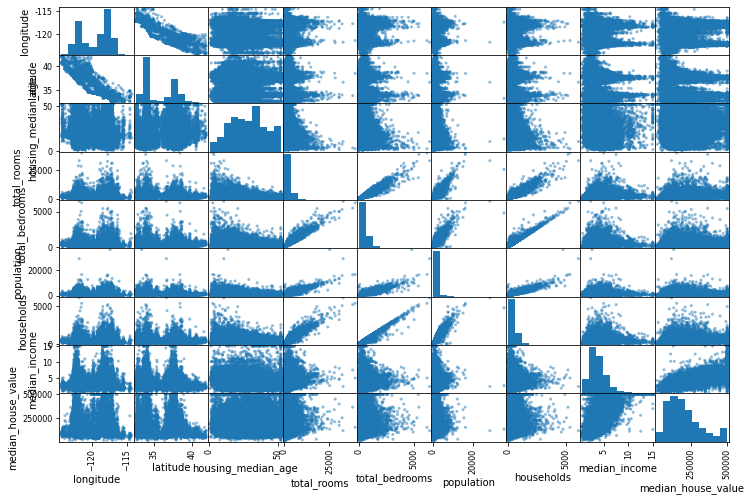

In [5]:
scatter_matrix(housing, figsize=(12, 8))

In [6]:
corr_matrix = housing.corr()
corr_matrix.shape
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_num = housing.drop("ocean_proximity", axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [8]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [9]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def minkowski(arr1, arr2, p):
  summation = 0
  for i in range(len(arr1)-1):
    summation += abs(arr1[i] - arr2[i])**p
  return summation ** (1/p)


def myKMeans(data, k, dist_type):
  # check distance type
  if dist_type == "manhattan":
    p = 1
  elif dist_type == "euclidean":
    p = 2
  elif dist_type == "sup":
    p = float("inf")

  # select k random points and set them as starting centroids
  rand_ints = np.random.randint(0, data.shape[0], size=(k))
  centroids = []
  for i in rand_ints:
    centroids.append(data[i])
  
  changed = True
  while changed:
  # make centroid dictionary
    centroid_cluster = {}
    for centroid in centroids:
      centroid_cluster[tuple(centroid.tolist())] = []

  # classify points
    for item in data:
      dists = []
      for centroid in centroids:
        dists.append(minkowski(item, centroid, p))
      smallest_dist = min(dists)
      closest_centroid = centroids[dists.index(smallest_dist)]
      centroid_cluster[tuple(closest_centroid.tolist())].append(item)

    # find average of points in each cluster, make that new centroid
    new_centroids = []
    for key in centroid_cluster.keys():
      new_centroids.append(np.mean(centroid_cluster[key], axis=0))

    if np.array_equal(new_centroids, centroids):
      changed = False

    centroids = new_centroids
    
  return centroid_cluster



- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


As the number of clusters increased, the standard deviation and the Sum Square Error decreased, as indicated by the elbow graph below. Based on visual inspection of this graph, it seems that k=3 has the greatest difference in SSE. Additionally, when k is relatively large, the cluster means start to get closer together, towards San Francisco and Los Angeles. This is likely because adding more clusters creates subsets of previous clusters, whose geographic centers happen to correspond. The clusters found don't neatly separate California into North and South, with k=2 for example. This is most likely because there are many other features involved in the clustering besides latitude and longitude. For other k levels, the centroids are fairly closely aligned with major population centers in California, including areas like Silicon Valley and Los Angeles. 

In [10]:
# Your code goes here
centroids2 = myKMeans(housing_prepared, 2, "euclidean")
centroids3 = myKMeans(housing_prepared, 3, "euclidean")
centroids4 = myKMeans(housing_prepared, 4, "euclidean")
centroids5 = myKMeans(housing_prepared, 5, "euclidean")
centroids6 = myKMeans(housing_prepared, 6, "euclidean")
centroids7 = myKMeans(housing_prepared, 7, "euclidean")
centroids8 = myKMeans(housing_prepared, 8, "euclidean")
centroids9 = myKMeans(housing_prepared, 9, "euclidean")
centroids10 = myKMeans(housing_prepared, 10, "euclidean")

# Your paragraph goes here for this section

[155913.00819489965, 122226.93499011017, 107068.80633616744, 94858.30610962471, 87382.97291842457, 82385.44335898959, 76467.8127391463, 73106.36258878944, 70012.14415715769]


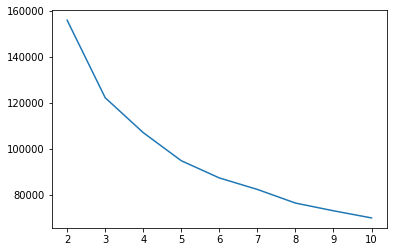

In [12]:
import matplotlib.pyplot as plt
def sse_calc(centroids_dict):
  sse_arr = 0
  for key in centroids_dict:
    for point in centroids_dict[key]:
      sse_arr += (point - list(key))**2
  sse = 0
  for i in sse_arr:
    sse += i
  return sse

sse_vals = []
sse_vals.append(sse_calc(centroids2))
sse_vals.append(sse_calc(centroids3))
sse_vals.append(sse_calc(centroids4))
sse_vals.append(sse_calc(centroids5))
sse_vals.append(sse_calc(centroids6))
sse_vals.append(sse_calc(centroids7))
sse_vals.append(sse_calc(centroids8))
sse_vals.append(sse_calc(centroids9))
sse_vals.append(sse_calc(centroids10))
print(sse_vals)
plt.plot([2,3,4,5,6,7,8,9,10], sse_vals)

In [13]:
def std_calc(centroids_dict, data):
  std_arr = 0
  for key in centroids_dict:
    for point in centroids_dict[key]:
      std_arr += (list(key) - point)**2
  std_arr = (std_arr/data.shape[0]) ** (1/2)
  return std_arr
print(std_calc(centroids2, housing_prepared))
print(std_calc(centroids3, housing_prepared))
print(std_calc(centroids5, housing_prepared))
print(std_calc(centroids10, housing_prepared))

[0.99772364 0.99797037 0.94836246 0.71345294 0.68595874 0.73898365
 0.68504676 0.99830577 0.99871167 0.49655536 0.46544953 0.01556219
 0.3138986  0.33491987]
[0.49583867 0.43930445 0.95876397 0.70720514 0.68803813 0.73894395
 0.68857145 0.99717649 0.99401998 0.44076236 0.44521282 0.01556064
 0.28912244 0.33363758]
[0.6342184  0.56704213 0.93616112 0.57541007 0.5584865  0.62266749
 0.56044012 0.76182804 0.69685801 0.44605635 0.43232294 0.01555946
 0.29675528 0.33271714]
[0.48836889 0.44361438 0.70862413 0.52528913 0.5202713  0.57987978
 0.51352813 0.65216443 0.61150934 0.42171779 0.38669947 0.01555661
 0.26959713 0.32933794]


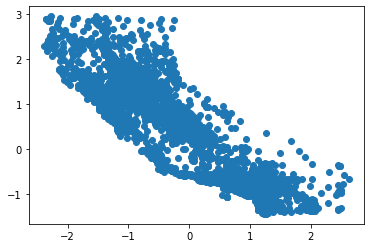

In [14]:
import matplotlib.pyplot as plt
plt.scatter(housing_prepared[:,0], housing_prepared[:,1])

In [15]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

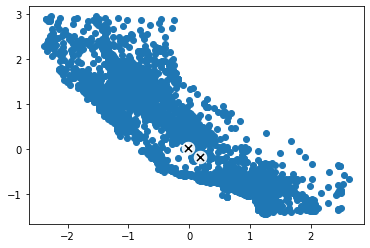

In [16]:
centroids = []
for key in centroids2.keys():
  centroids.append(list(key))
centroids = np.array(centroids)
plot_centroids(centroids)
plt.scatter(housing_prepared[:,0], housing_prepared[:,1])

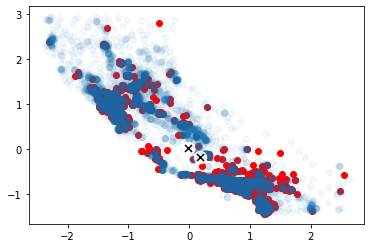

In [17]:
centroid1_points = []
centroid2_points = []
count = 0
for key in centroids2.keys():
  count += 1
  if count == 1:
    centroid1_points = centroids2[key]
  elif count == 2:
    centroid2_points = centroids2[key]
cent1_x = []
cent1_y = []
for point in centroid1_points:
  cent1_x.append(point[0])
  cent1_y.append(point[1])

cent2_x = []
cent2_y = []
for point in centroid2_points:
  cent2_x.append(point[0])
  cent2_y.append(point[1])

plot_centroids(centroids)
plt.scatter(cent1_x, cent1_y, color="red")
plt.scatter(cent2_x, cent2_y, alpha=0.05)

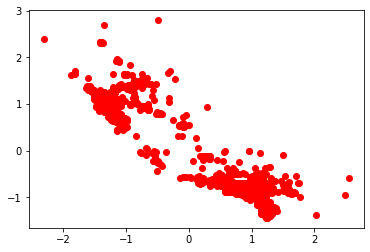

In [18]:
plt.scatter(cent1_x, cent1_y, color="red")

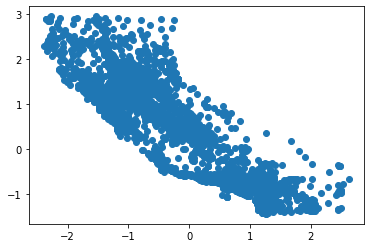

In [19]:
plt.scatter(cent2_x, cent2_y)

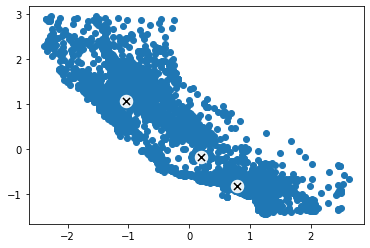

In [20]:
centroids = []
for key in centroids3.keys():
  centroids.append(list(key))
centroids = np.array(centroids)
plot_centroids(centroids)
plt.scatter(housing_prepared[:,0], housing_prepared[:,1])

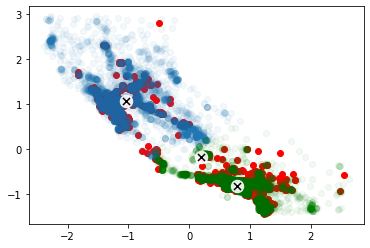

In [21]:
centroid1_points = []
centroid2_points = []
centroid3_points = []
count = 0
for key in centroids3.keys():
  count += 1
  if count == 1:
    centroid1_points = centroids3[key]
  elif count == 2:
    centroid2_points = centroids3[key]
  elif count == 3:
    centroid3_points = centroids3[key]
cent1_x = []
cent1_y = []
for point in centroid1_points:
  cent1_x.append(point[0])
  cent1_y.append(point[1])

cent2_x = []
cent2_y = []
for point in centroid2_points:
  cent2_x.append(point[0])
  cent2_y.append(point[1])

cent3_x = []
cent3_y = []
for point in centroid3_points:
  cent3_x.append(point[0])
  cent3_y.append(point[1])

plot_centroids(centroids)
plt.scatter(cent1_x, cent1_y, color="red")
plt.scatter(cent2_x, cent2_y, alpha=0.05)
plt.scatter(cent3_x, cent3_y, alpha=0.05, color="green")

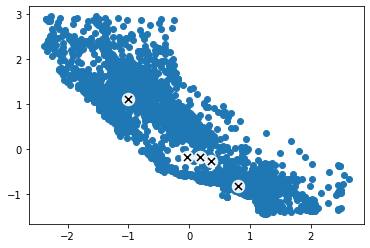

In [22]:
centroids = []
for key in centroids5.keys():
  centroids.append(list(key))
centroids = np.array(centroids)
plot_centroids(centroids)
plt.scatter(housing_prepared[:,0], housing_prepared[:,1])

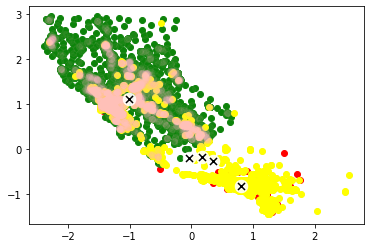

In [23]:
centroid1_points = []
centroid2_points = []
centroid3_points = []
centroid4_points = []
centroid5_points = []
count = 0
for key in centroids5.keys():
  count += 1
  if count == 1:
    centroid1_points = centroids5[key]
  elif count == 2:
    centroid2_points = centroids5[key]
  elif count == 3:
    centroid3_points = centroids5[key]
  elif count == 4:
    centroid2_points = centroids5[key]
  elif count == 5:
    centroid3_points = centroids5[key]
cent1_x = []
cent1_y = []
for point in centroid1_points:
  cent1_x.append(point[0])
  cent1_y.append(point[1])

cent2_x = []
cent2_y = []
for point in centroid2_points:
  cent2_x.append(point[0])
  cent2_y.append(point[1])

cent3_x = []
cent3_y = []
for point in centroid3_points:
  cent3_x.append(point[0])
  cent3_y.append(point[1])

cent4_x = []
cent4_y = []
for point in centroid4_points:
  cent4_x.append(point[0])
  cent4_y.append(point[1])

cent5_x = []
cent5_y = []
for point in centroid5_points:
  cent5_x.append(point[0])
  cent5_y.append(point[1])

plot_centroids(centroids)
plt.scatter(cent1_x, cent1_y, color="red")
plt.scatter(cent2_x, cent2_y, alpha=0.05)
plt.scatter(cent3_x, cent3_y, color="green")
plt.scatter(cent2_x, cent2_y, color="yellow")
plt.scatter(cent3_x, cent3_y, alpha=0.05, color="pink")

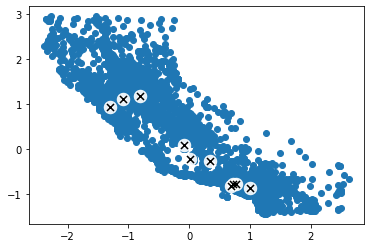

In [24]:
centroids = []
for key in centroids10.keys():
  centroids.append(list(key))
centroids = np.array(centroids)
plot_centroids(centroids)
plt.scatter(housing_prepared[:,0], housing_prepared[:,1])



- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



Based on the elbow graph above, k=3 is the ideal amount of clusters. Looking at the plotted points and cluster means, the centroids are located close to San Franciso, Los Angeles, and an area near Bakersfield California. This indicates that the highest cost of housing is centered in SF and LA, and the rest is spread across California, happening to center around Bakersfield. This suggests that LA and SF have very high costs. These 2 areas are also the population centers. I would conclude from this that most people are flocking to these areas, but aren't able to afford the cost of living. This may suggest that not enough area outside of this cities is dedicated to housing. Building more homes further from these cities so that the cost of living is lower could allow more people to be able to afford housing, addressing California's housing crisis.

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!